<a href="https://colab.research.google.com/github/MEDHANGSHI0708/LandScope-AI-/blob/main/Landsat9_analysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.CLOUD COVER PERCENTAGE PREDICTION
Train pur model to predict the percentage of cloud cover in a specific image.


Target colums:Cloud_cover or Cloud_Cover_Land

In [1]:
! pip install geemap

In [2]:
! pip install ee

In [3]:
!pip install earthengine-api


In [4]:
!pip uninstall earthengine-api -y
!pip install --no-cache-dir earthengine-api


Found existing installation: earthengine-api 1.5.2
Uninstalling earthengine-api-1.5.2:
  Successfully uninstalled earthengine-api-1.5.2


In [5]:
!pip install -U pip
!pip install geemap folium


In [49]:
import ee
import geemap

In [ ]:
!pip install --upgrade earthengine-api


In [6]:
import ee

ee.Authenticate()

ee.Initialize(project='ee-code2modelxx')

print("Earth Engine initialized successfully!")


Earth Engine initialized successfully!


In [7]:
import ee
aoi = ee.Geometry.Polygon([
    [[-60.3, -3.5], [-60.3, -2.8],
     [-59.8, -2.8], [-59.8, -3.5],
     [-60.3, -3.5]]
])

print(aoi.getInfo())


{'type': 'Polygon', 'coordinates': [[[-60.3, -3.5], [-59.8, -3.5], [-59.8, -2.8], [-60.3, -2.8], [-60.3, -3.5]]]}


In [8]:
landsat = (
    ee.ImageCollection("LANDSAT/LC09/C02/T1")
    .filterBounds(aoi)
    .filterDate("2023-01-01", "2023-12-31")
    .sort("CLOUD_COVER")
    .first()
)

print("Selected Image ID:", landsat.get("system:index").getInfo())


Selected Image ID: LC09_231062_20230723


In [9]:
!pip install earthengine-api geemap


In [10]:
# fileting
landsat = (
    ee.ImageCollection("LANDSAT/LC09/C02/T1")
    .filterBounds(aoi)
    .filterDate("2023-01-01", "2023-12-31")
    .sort("CLOUD_COVER")
    .first()
)
print("Selected Image ID:", landsat.get("system:index").getInfo())


Selected Image ID: LC09_231062_20230723


In [12]:
import geemap
Map = geemap.Map()


vis_params = {
    "bands": ["B4", "B3", "B2"],  # red
    "min": 3000,
    "max": 30000,
    "gamma": 1.0,
}
Map.centerObject(aoi, 8)
Map.addLayer(landsat, vis_params, "Landsat 9")
Map


Map(center=[-3.1499907021373037, -60.050000000000246], controls=(WidgetControl(options=['position', 'transpare…

In [13]:

aoi = ee.Geometry.Polygon([
    [[-60.3, -3.5], [-60.3, -2.8],
     [-59.8, -2.8], [-59.8, -3.5],
     [-60.3, -3.5]]
])

print("AOI Geometry:", aoi.getInfo())


landsat = (
    ee.ImageCollection("LANDSAT/LC09/C02/T1")
    .filterBounds(aoi)
    .filterDate("2023-01-01", "2023-12-31")
    .filter(ee.Filter.gt("CLOUD_COVER", 70))
    .sort("CLOUD_COVER", False)
    .first()
)
print("Selected Image ID:", landsat.get("system:index").getInfo())
print("Cloud Cover:", landsat.get("CLOUD_COVER").getInfo())


AOI Geometry: {'type': 'Polygon', 'coordinates': [[[-60.3, -3.5], [-59.8, -3.5], [-59.8, -2.8], [-60.3, -2.8], [-60.3, -3.5]]]}
Selected Image ID: LC09_231062_20230402
Cloud Cover: 97.2


In [14]:
vis_params = {
    "bands": ["B4", "B3", "B2"],  # red green blue daldo
    "min": 1000,
    "max": 15000,
    "gamma": 1.5
}


In [15]:

Map.addLayer(landsat, vis_params, "Cloudy Landsat 9 Image")

Map


Map(bottom=33642.0, center=[-3.1499907021373037, -60.050000000000246], controls=(WidgetControl(options=['posit…

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
from google.colab import files
uploaded = files.upload()


Saving Satellite imagery2.csv to Satellite imagery2 (1).csv


In [18]:
df=pd.read_csv("Satellite imagery2.csv")
print(df.head())

      B1     B2     B3  Cloud_Cover  Cloud_Cover_Land              Image_ID  \
0  14631  13587  12729        88.83             88.83  LC09_230062_20230105   
1  11827  10780  10189        92.01             92.01  LC09_230062_20230121   
2  13195  12127  11472        92.01             92.01  LC09_230062_20230121   
3  10991   9733   8680        92.01             92.01  LC09_230062_20230121   
4  11501  10265   8725        92.01             92.01  LC09_230062_20230121   

   Image_Quality_OLI  Image_Quality_TIRS     MNDWI      NDBI      NDVI  \
0                9.0                 9.0 -0.094473 -0.257946  0.390468   
1                9.0                 9.0 -0.146829 -0.250048  0.428822   
2                9.0                 9.0 -0.129227 -0.185068  0.351280   
3                9.0                 9.0 -0.091765 -0.289140  0.444483   
4                9.0                 9.0  0.022022 -0.224143  0.263355   

   QA_PIXEL            Timestamp                                    .geo  
0    

In [19]:
df.columns

Index(['B1', 'B2', 'B3', 'Cloud_Cover', 'Cloud_Cover_Land', 'Image_ID',
       'Image_Quality_OLI', 'Image_Quality_TIRS', 'MNDWI', 'NDBI', 'NDVI',
       'QA_PIXEL', 'Timestamp', '.geo'],
      dtype='object')

IMAGE_QUALITY_OLI	DOUBLE
The composite image quality for the OLI bands. Values: 9 = Best. 1 = Worst. 0 = Image quality not calculated. This parameter is only present if OLI bands are present in the product.

IMAGE_QUALITY_TIRS	DOUBLE
The composite image quality for the TIRS bands. Values: 9 = Best. 1 = Worst. 0 = Image quality not calculated. This parameter is only present if OLI bands are present in the product.
CLOUD_COVER	DOUBLE
Percentage cloud cover (0-100), -1 = not calculated.

CLOUD_COVER_LAND	DOUBLE
Percentage cloud cover over land (0-100), -1 = not calculated.

Name	Pixel Size	Wavelength	Description
B1	30 meters	0.43 - 0.45 μm
Coastal aerosol

B2	30 meters	0.45 - 0.51 μm
Blue

B3	30 meters	0.53 - 0.59 μm
Green



NDVI → Detects forest areas & vegetation loss.
NDBI → Identifies urban expansion.
MNDWI → Maps water bodies and changes over time.

In [20]:
df

,B1,B2,B3,Cloud_Cover,Cloud_Cover_Land,Image_ID,Image_Quality_OLI,Image_Quality_TIRS,MNDWI,NDBI,NDVI,QA_PIXEL,Timestamp,.geo
0,14631,13587,12729,88.83,88.83,LC09_230062_20230105,9.0,9.0,-0.094473,-0.257946,0.390468,54596,2023-01-05T14:07:12,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,11827,10780,10189,92.01,92.01,LC09_230062_20230121,9.0,9.0,-0.146829,-0.250048,0.428822,23888,2023-01-21T14:07:03,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,13195,12127,11472,92.01,92.01,LC09_230062_20230121,9.0,9.0,-0.129227,-0.185068,0.351280,24144,2023-01-21T14:07:03,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,10991,9733,8680,92.01,92.01,LC09_230062_20230121,9.0,9.0,-0.091765,-0.289140,0.444483,23888,2023-01-21T14:07:03,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,11501,10265,8725,92.01,92.01,LC09_230062_20230121,9.0,9.0,0.022022,-0.224143,0.263355,23888,2023-01-21T14:07:03,"{""type"":""MultiPoint"",""coordinates"":[]}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8145,11760,10590,9603,59.10,59.10,LC09_231062_20231214,9.0,9.0,-0.194818,-0.091749,0.325518,21824,2023-12-14T14:13:14,"{""type"":""MultiPoint"",""coordinates"":[]}"
8146,11806,10643,9515,59.10,59.10,LC09_231062_20231214,9.0,9.0,-0.051960,-0.257759,0.372904,21824,2023-12-14T14:13:14,"{""type"":""MultiPoint"",""coordinates"":[]}"
8147,12111,10934,9518,59.10,59.10,LC09_231062_20231214,9.0,9.0,0.072813,-0.222752,0.209665,24082,2023-12-14T14:13:14,"{""type"":""MultiPoint"",""coordinates"":[]}"
8148,11160,9884,8902,59.10,59.10,LC09_231062_20231214,9.0,9.0,-0.100672,-0.303144,0.461183,21824,2023-12-14T14:13:14,"{""type"":""MultiPoint"",""coordinates"":[]}"


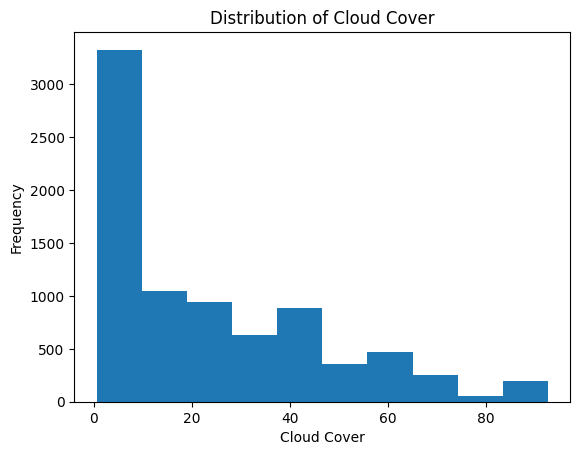

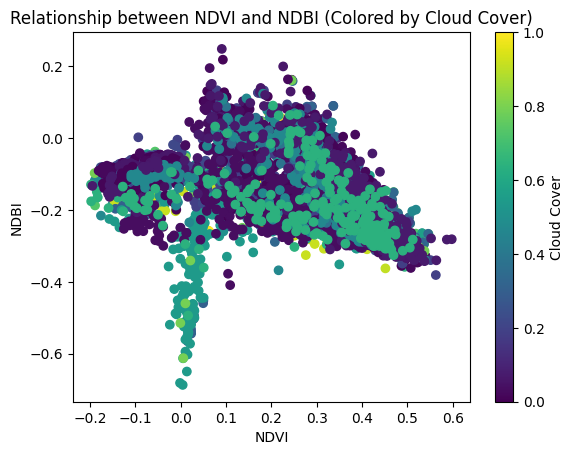

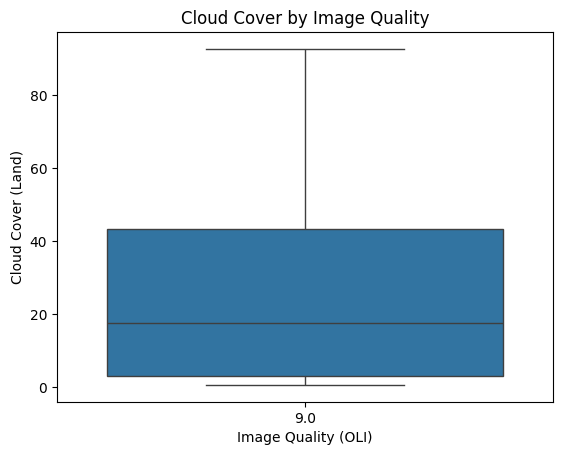

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.hist(df['Cloud_Cover'], bins=10)
plt.xlabel("Cloud Cover")
plt.ylabel("Frequency")
plt.title("Distribution of Cloud Cover")
plt.show()

# Scatter plot of NDVI vs. NDBI
import matplotlib.cm as cm
# Assuming 'Cloud_Cover' is the third variable you want to use for color
colors = cm.viridis(df['Cloud_Cover'] / df['Cloud_Cover'].max())
plt.scatter(df['NDVI'], df['NDBI'], c=colors)
plt.xlabel("NDVI")
plt.ylabel("NDBI")
plt.title("Relationship between NDVI and NDBI (Colored by Cloud Cover)")
plt.colorbar(label='Cloud Cover')
plt.show()

# Box plot of Cloud_Cover_Land by Image_Quality_OLI
sns.boxplot(x='Image_Quality_OLI', y='Cloud_Cover_Land', data=df)
plt.xlabel("Image Quality (OLI)")
plt.ylabel("Cloud Cover (Land)")
plt.title("Cloud Cover by Image Quality")
plt.show()

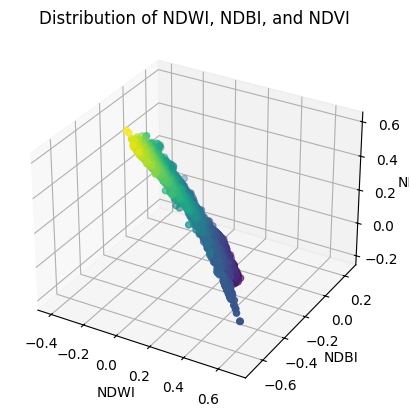

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MNDWI'], df['NDBI'], df['NDVI'], c=df['NDVI'], cmap='viridis')

ax.set_xlabel('NDWI')
ax.set_ylabel('NDBI')
ax.set_zlabel('NDVI')
ax.set_title('Distribution of NDWI, NDBI, and NDVI')

plt.show()

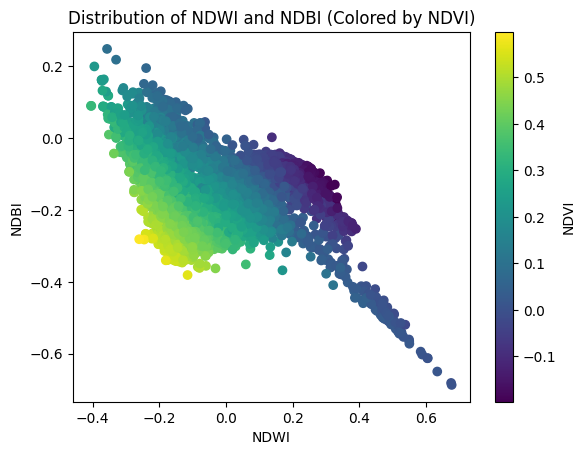

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df['MNDWI'], df['NDBI'], c=df['NDVI'], cmap='viridis')

plt.xlabel('NDWI')
plt.ylabel('NDBI')
plt.title('Distribution of NDWI and NDBI (Colored by NDVI)')
plt.colorbar(label='NDVI')

plt.show()

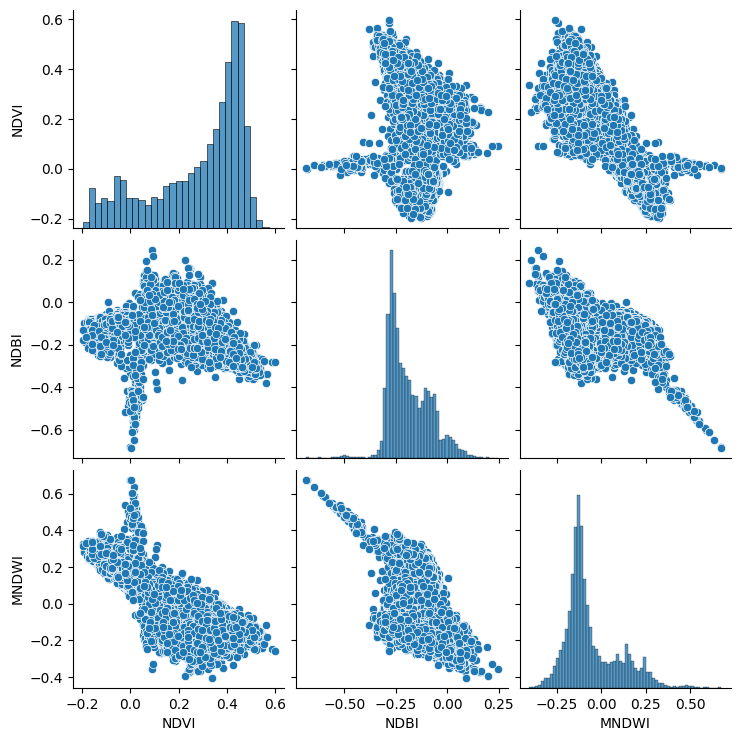

In [24]:
import seaborn as sns

sns.pairplot(df[['NDVI', 'NDBI', 'MNDWI']])
plt.show()

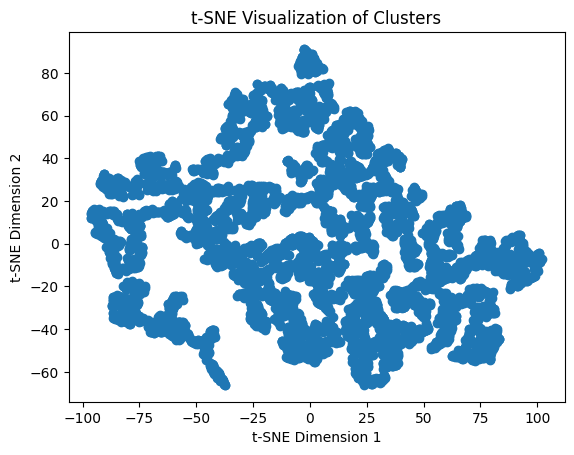

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df[['NDVI', 'NDBI', 'MNDWI']])

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Clusters')
plt.show()


In [26]:
from sklearn.cluster import KMeans
import pandas as pd
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df[['NDVI', 'NDBI', 'MNDWI']])
df['Cluster'] = clusters

In [27]:
df

,B1,B2,B3,Cloud_Cover,Cloud_Cover_Land,Image_ID,Image_Quality_OLI,Image_Quality_TIRS,MNDWI,NDBI,NDVI,QA_PIXEL,Timestamp,.geo,Cluster
0,14631,13587,12729,88.83,88.83,LC09_230062_20230105,9.0,9.0,-0.094473,-0.257946,0.390468,54596,2023-01-05T14:07:12,"{""type"":""MultiPoint"",""coordinates"":[]}",1
1,11827,10780,10189,92.01,92.01,LC09_230062_20230121,9.0,9.0,-0.146829,-0.250048,0.428822,23888,2023-01-21T14:07:03,"{""type"":""MultiPoint"",""coordinates"":[]}",1
2,13195,12127,11472,92.01,92.01,LC09_230062_20230121,9.0,9.0,-0.129227,-0.185068,0.351280,24144,2023-01-21T14:07:03,"{""type"":""MultiPoint"",""coordinates"":[]}",1
3,10991,9733,8680,92.01,92.01,LC09_230062_20230121,9.0,9.0,-0.091765,-0.289140,0.444483,23888,2023-01-21T14:07:03,"{""type"":""MultiPoint"",""coordinates"":[]}",1
4,11501,10265,8725,92.01,92.01,LC09_230062_20230121,9.0,9.0,0.022022,-0.224143,0.263355,23888,2023-01-21T14:07:03,"{""type"":""MultiPoint"",""coordinates"":[]}",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8145,11760,10590,9603,59.10,59.10,LC09_231062_20231214,9.0,9.0,-0.194818,-0.091749,0.325518,21824,2023-12-14T14:13:14,"{""type"":""MultiPoint"",""coordinates"":[]}",2
8146,11806,10643,9515,59.10,59.10,LC09_231062_20231214,9.0,9.0,-0.051960,-0.257759,0.372904,21824,2023-12-14T14:13:14,"{""type"":""MultiPoint"",""coordinates"":[]}",1
8147,12111,10934,9518,59.10,59.10,LC09_231062_20231214,9.0,9.0,0.072813,-0.222752,0.209665,24082,2023-12-14T14:13:14,"{""type"":""MultiPoint"",""coordinates"":[]}",0
8148,11160,9884,8902,59.10,59.10,LC09_231062_20231214,9.0,9.0,-0.100672,-0.303144,0.461183,21824,2023-12-14T14:13:14,"{""type"":""MultiPoint"",""coordinates"":[]}",1


In [28]:
unique_clusters = df['Cluster'].unique()
print(unique_clusters)

[1 2 0]


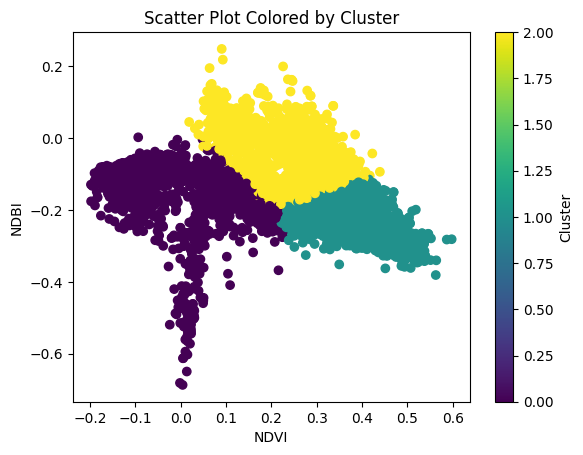

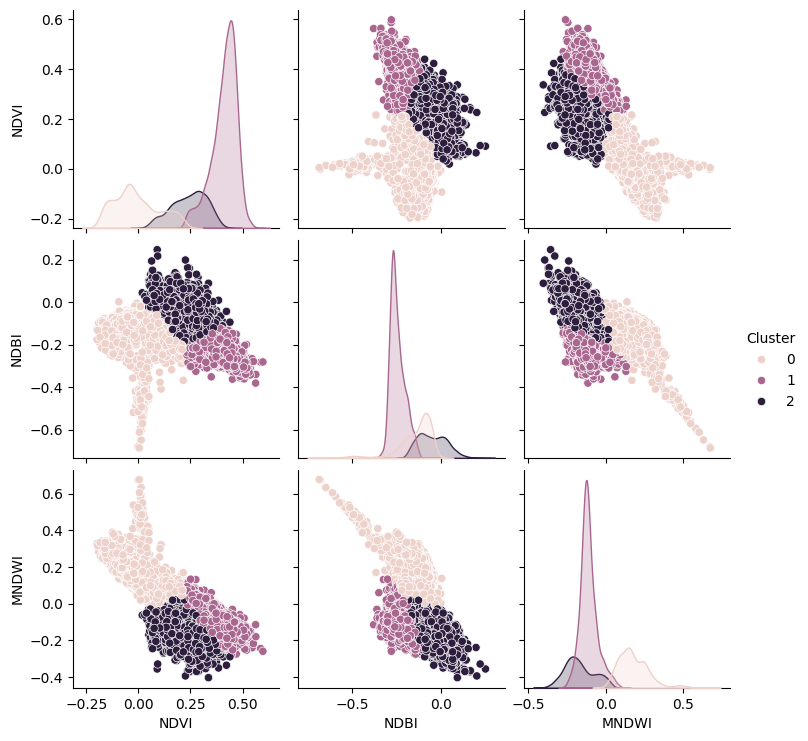

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot colored by cluster
plt.scatter(df['NDVI'], df['NDBI'], c=df['Cluster'], cmap='viridis')
plt.xlabel('NDVI')
plt.ylabel('NDBI')
plt.title('Scatter Plot Colored by Cluster')
plt.colorbar(label='Cluster')
plt.show()

# Pair plot colored by cluster
sns.pairplot(df[['NDVI', 'NDBI', 'MNDWI', 'Cluster']], hue='Cluster')
plt.show()

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [31]:

features = ['NDVI', 'NDBI', 'MNDWI']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_
df['Cluster'] = clusters

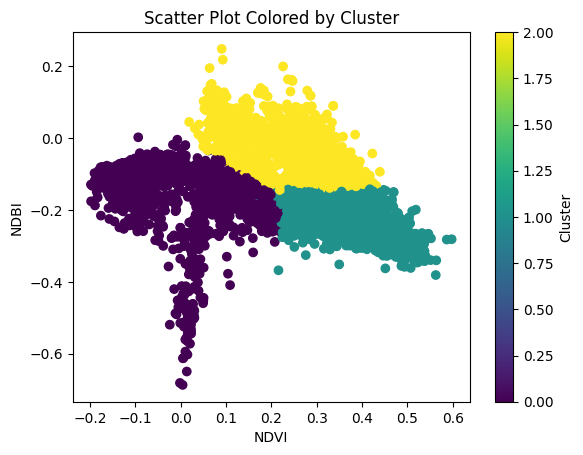

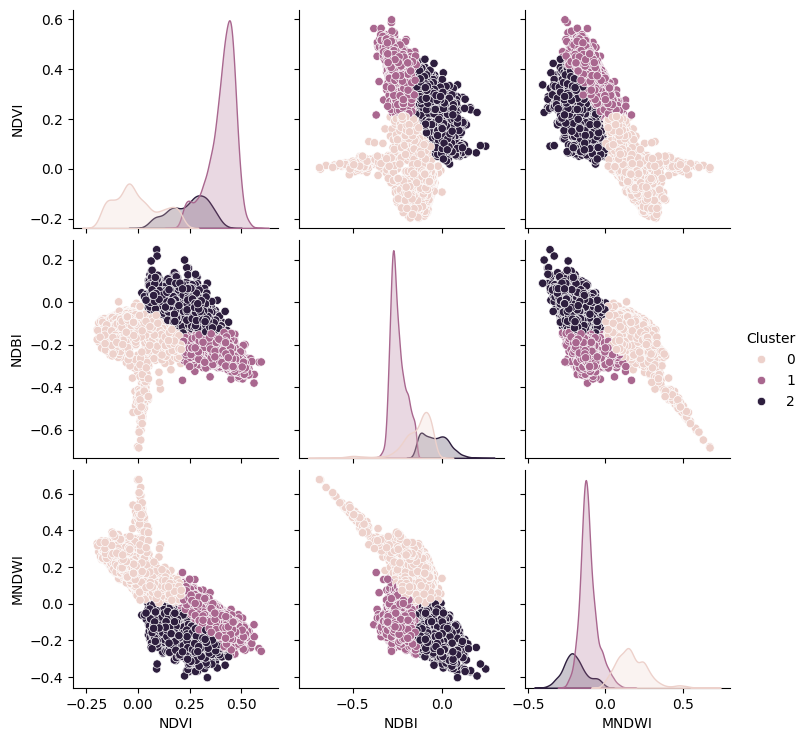

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot colored by cluster
plt.scatter(df['NDVI'], df['NDBI'], c=df['Cluster'], cmap='viridis')
plt.xlabel('NDVI')
plt.ylabel('NDBI')
plt.title('Scatter Plot Colored by Cluster')
plt.colorbar(label='Cluster')
plt.show()

# Pair plot colored by cluster
sns.pairplot(df[['NDVI', 'NDBI', 'MNDWI', 'Cluster']], hue='Cluster')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:

X = df[['NDVI', 'NDBI', 'MNDWI']]
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
import joblib

joblib.dump(rf_model, "rf_model.pkl")

print("Model saved successfully as rf_model.pkl")


Model saved successfully as rf_model.pkl


In [38]:
import joblib


rf_model = joblib.load("rf_model.pkl")

print("Model loaded successfully")


Model loaded successfully


In [39]:

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.994478527607362
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       394
           1       1.00      1.00      1.00       953
           2       0.99      0.99      0.99       283

    accuracy                           0.99      1630
   macro avg       0.99      0.99      0.99      1630
weighted avg       0.99      0.99      0.99      1630



In [40]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.994478527607362


In [41]:
import joblib

rf_model = joblib.load("rf_model.pkl")




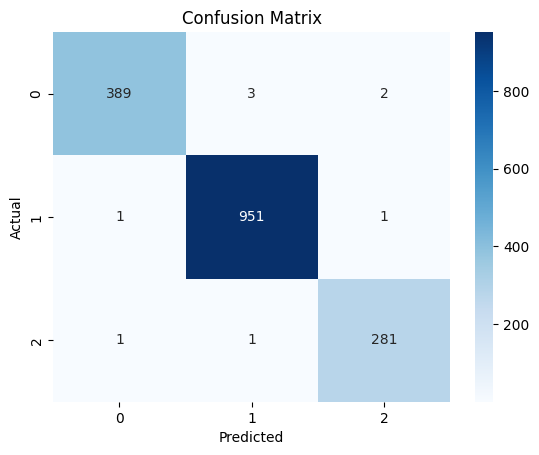

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()